# Movie Recommendation System with Python
In this project, we'll develop a basic recommender system with Python and pandas.

Movies will be suggested by similarity to other movies; this is not a robust recommendation system, but something to start out on.

In [1]:
#This is to install required modules
import piplite
await piplite.install('seaborn')
await piplite.install('scipy')

In [2]:
import numpy as np
import pandas as pd

## Data
We have two datasets:

+ A dataset of movie ratings.
+ A dataset of all movies titles and their ids.

In [3]:
#Reading the ratings dataset.
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('../data/data.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,9438161,NaN,NaN,NaN
1,332,222.0,4.0,887916529.0
2,551,735.0,5.0,892783110.0
3,13,160.0,4.0,882140070.0
4,532,946.0,5.0,888635366.0


Reading the movie titles

In [5]:
movie_titles = pd.read_csv("../data/Movie_Id_Titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We can merge them together:

In [6]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,332,222.0,4.0,887916529.0,Star Trek: First Contact (1996)
1,717,222.0,4.0,884642215.0,Star Trek: First Contact (1996)
2,664,222.0,3.0,876524641.0,Star Trek: First Contact (1996)
3,749,222.0,3.0,878847716.0,Star Trek: First Contact (1996)
4,323,222.0,3.0,878739251.0,Star Trek: First Contact (1996)


## Exploratory Analysis
Let's explore the data a bit and get a look at some of the best rated movies.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Fresh (1994)                             5.0
Crossfire (1947)                         5.0
Little City (1998)                       5.0
Visitors, The (Visiteurs, Les) (1993)    5.0
They Made Me a Criminal (1939)           5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)               299
Liar Liar (1997)               260
Return of the Jedi (1983)      259
English Patient, The (1996)    255
Fargo (1996)                   255
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.666667
101 Dalmatians (1996),2.877193
12 Angry Men (1957),4.360656
187 (1997),3.130435


Setting the number of ratings column:

In [11]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,3
1-900 (1994),2.666667,3
101 Dalmatians (1996),2.877193,57
12 Angry Men (1957),4.360656,61
187 (1997),3.130435,23


Visualizing the number of ratings:

<AxesSubplot:>

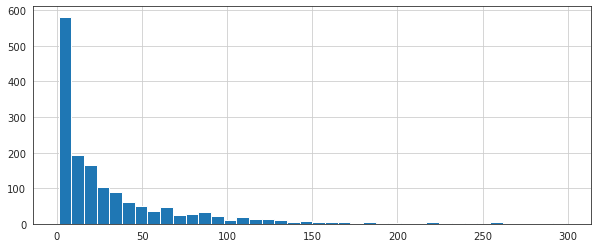

In [12]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=40)

<AxesSubplot:>

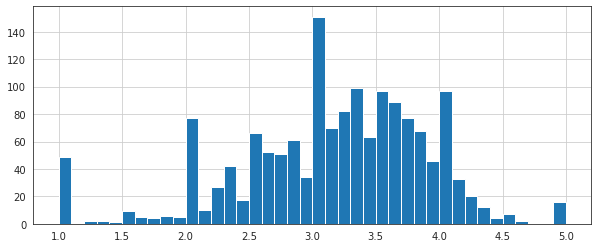

In [13]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=40)

It makes intuitive sense for most ratings to be around the 3.0 mark.

## Recommending Similar Movies
The next step is to create a martix that has the user ids on one axis and the movie titles on another. Each cell will then consist of the rating of a movie by a particular user

In [14]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's normal for there to be lots of NaN values, as not everyone would have seen most movies.

Checking out the Most rated movie:

In [15]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.384615,299
Liar Liar (1997),3.211538,260
Return of the Jedi (1983),4.015444,259
"English Patient, The (1996)",3.686275,255
Fargo (1996),4.101961,255
Toy Story (1995),3.887967,241
Contact (1997),3.756303,238
Independence Day (ID4) (1996),3.381356,236
Air Force One (1997),3.636771,223


Let's choose two movies to focus on: starwars, a sci-fi movie. And Dumb and Dumber, a comedy.

In [16]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,3
1-900 (1994),2.666667,3
101 Dalmatians (1996),2.877193,57
12 Angry Men (1957),4.360656,61
187 (1997),3.130435,23


Now let's grab the user ratings for those two movies:

In [17]:
starwars_user_ratings = moviemat['Star Wars (1977)']
dumb_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Star Wars (1977), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [18]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(dumb_user_ratings)

/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Let's clean the data by removing NaN values and using a DataFrame instead of a series:

In [19]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
101 Dalmatians (1996),0.193936
12 Angry Men (1957),0.188129
187 (1997),-0.218218
2 Days in the Valley (1996),0.065779
"20,000 Leagues Under the Sea (1954)",0.200000


If we sort the dataframe by correlation, we should get the most similar movies, however there will be some results that don't really make sense.

This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [20]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Dream With the Fishes (1997),1.0
"Low Down Dirty Shame, A (1994)",1.0
All Dogs Go to Heaven 2 (1996),1.0
Love Serenade (1996),1.0
Star Wars (1977),1.0
Trust (1990),1.0
Kansas City (1996),1.0
"Pest, The (1997)",1.0
Children of the Revolution (1996),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [21]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
101 Dalmatians (1996),0.193936,57
12 Angry Men (1957),0.188129,61
187 (1997),-0.218218,23
2 Days in the Valley (1996),0.065779,54
"20,000 Leagues Under the Sea (1954)",0.200000,41


Now sort the values and notice how the titles make a lot more sense:

In [22]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,299
"Empire Strikes Back, The (1980)",0.622195,188
Return of the Jedi (1983),0.558921,259
Raiders of the Lost Ark (1981),0.506451,221
Tomorrow Never Dies (1997),0.492095,101


Now the same for Liar Liar:

In [23]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,260
Sleepless in Seattle (1993),0.498420,112
"Shawshank Redemption, The (1994)",0.485313,133
Chasing Amy (1997),0.483138,191
In & Out (1997),0.437710,117


And we're done!

It looks like our results make sense. Even though the system is far from state of the art, it still recommended the other Star Wars movies (and another George Lucas film) for Star Wars; while it looks like there's some scope for more improvement in Liar Liar (although we do get another Jim Carrey movie as a recommendation too).

This concludes this project.